<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_Explicito_de_la_ecuacion_de_onda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = red>Método explícito de La ecuacion de la onda



Use los tamaños de paso  $ h =0.1$ y $ k=0.05$ para aproximar la solucion de la ecuacion de onda

$$\frac{\partial^2 U}{\partial t^2}(x,t) - 4 \frac{\partial^2 U}{\partial x^2}(x,t) = 0 , 0<x<1 , 0<t $$

con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t $$

##y condiciones iniciales:

$$u(x,0) = sen( πx), 0≤x≤1 $$
y
$$\frac{\partial U}{\partial t}(x,0) = 0, 0≤x≤1 $$

Compare los resultados con la solucion exacta:

$$u(x,t)=sen(πx)cos(2πt)$$


##La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j-1} - 2u_{i,j} + u_{i.j+1}}{k^2} = \alpha^2 \frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{h^2}$$

##Reorganizando, se obtiene:

$$ u_{i,j+1} = ru_{i-1,j} + ru_{i+1,j} + (2 - 2r) u_{i,j} - u_{i,j-1} $$

##donde $r= \alpha^2 \frac{k^2}{h^2}$

##<font color = Purple> Librerias que vamos  a ocupar

In [ ]:
import sympy as sp #SymPy es una librería para matemáticas simbólicas. Permite trabajar con variables algebraicas, ecuaciones, derivadas, integrales, etc.,
import numpy as np #NumPy es la librería fundamental para cálculo numérico en Python. Proporciona arrays multidimensionales, funciones matemáticas, operaciones de álgebra lineal, etc.

import matplotlib.pyplot as plt # Matplotlib es la librería estándar para crear visualizaciones en 2D y 3D.
                                # pyplot es un módulo que ofrece una interfaz similar a MATLAB para generar gráficos.
from mpl_toolkits.mplot3d import Axes3D # Habilita la creación de gráficos tridimensionales (ejes 3D) en Matplotlib.
from matplotlib import cm #cm (colormaps) proporciona mapas de colores para visualizar datos en 2D/3D
                          #Útil para asignar colores a superficies según valores numéricos.
from matplotlib.animation import FuncAnimation, PillowWriter # ANIMACIONES
from tabulate import tabulate # TABLAS

##<font color = Purple> Parmetros para resolver la ecuación de onda

In [ ]:
h, k, c = 0.1, 0.05, 2.0 # h = paso espacial, k = paso temporal, c = velocidad de la onda
lambda_val = c * k / h # Parámetro de estabilidad

# Verificar condición de estabilidad
print(f"h: {h}, k: {k}, c: {c}, λ: {lambda_val:.3f}") # Mostrar parámetros numéricos
print("Estable: Sí" if lambda_val <= 1 else "Estable: No") # Evaluar condición de estabilidad

h: 0.1, k: 0.05, c: 2.0, λ: 1.000
Estable: Sí


##<font color = Purple> Definimos la malla con la cual vamos a trabajar

In [ ]:
h = 0.1  # Paso espacial - distancia entre puntos en el eje X
k = 0.05 # Paso temporal - intervalo entre cálculos en el tiempo
t_max = 1.0 # Tiempo máximo de simulación - duración total del experimento

# Crear mallas

x_points = np.arange(0, 1 + h, h) # Puntos espaciales desde 0 hasta 1 (inclusive), separados por h
t_points = np.linspace(0, t_max, int(t_max / k) + 1) # Puntos temporales desde 0 hasta t_max, distribuidos uniformemente

# VISUALIZACIÓN EN FORMATO DE TABLA
print("┌────────────────────────────────────────┐")
print("│         PARÁMETROS DE MALLA            │")
print("├────────────────────────────────────────┤")
print(f"│ Espacio: 0 → 1 (h = {h})              │")
print(f"│ Puntos espaciales: {len(x_points):2d}                       │")
print(f"│ Tiempo:  0 → {t_max} (k = {k})            │")
print(f"│ Pasos temporales:  {len(t_points):2d}                  │")
print(f"│ Resolución: {len(x_points)} × {len(t_points)} puntos         │")
print("└────────────────────────────────────────┘")

┌────────────────────────────────────────┐
│         PARÁMETROS DE MALLA            │
├────────────────────────────────────────┤
│ Espacio: 0 → 1 (h = 0.1)              │
│ Puntos espaciales: 11                       │
│ Tiempo:  0 → 1.0 (k = 0.05)            │
│ Pasos temporales:  21                  │
│ Resolución: 11 × 21 puntos         │
└────────────────────────────────────────┘


##<font color = Purple> Usando la condicion inicial

In [ ]:
def condicion_inicial(x):
    return np.sin(np.pi * x)

In [ ]:
n_t = len(t_points) # Número de puntos temporales
n_x = len(x_points) # Número de puntos espaciales

# Inicializar matriz de solución U(t,x) con ceros
# Dimensiones: tiempo × espacio (n_t × n_x)
U = np.zeros((n_t, n_x))

# Aplicar condición inicial en t=0: u(x,0) = sin(πx)
# Llena la primera fila (tiempo 0) con los valores de la condición inicial
U[0, :] = condicion_inicial(x_points)

# PREPARAR DATOS PARA TABLA
tabla_datos = []
print("CONDICIÓN INICIAL APLICADA")
print("La solución en t=0 sigue: u(x,0) = sin(πx)")
print("-" * 50)

# Crear lista de tuplas (posición, valor) para la tabla
for i, x_val in enumerate(x_points):
    tabla_datos.append([f"x = {x_val:.2f}", f"u({x_val:.1f}, 0)", f"{U[0, i]:.6f}"])

# MOSTRAR EN FORMATO DE TABLA ELEGANTE
print(tabulate(tabla_datos,
               headers=["Posición", "Notación", "Valor"],
               tablefmt="grid",
               stralign="center"))

# INFORMACIÓN ADICIONAL SOBRE LA CONDICIÓN INICIAL
print(f"\nResumen de condición inicial:")
print(f"• Rango espacial: [{x_points[0]:.1f}, {x_points[-1]:.1f}]")
print(f"• Valor mínimo: {np.min(U[0, :]):.4f} en x = {x_points[np.argmin(U[0, :])]:.1f}")
print(f"• Valor máximo: {np.max(U[0, :]):.4f} en x = {x_points[np.argmax(U[0, :])]:.1f}")
print(f"• Nodos totales: {len(x_points)} puntos espaciales")

CONDICIÓN INICIAL APLICADA
La solución en t=0 sigue: u(x,0) = sin(πx)
--------------------------------------------------
+------------+------------+----------+
|  Posición  |  Notación  |    Valor |
+============+============+==========+
|  x = 0.00  | u(0.0, 0)  | 0        |
+------------+------------+----------+
|  x = 0.10  | u(0.1, 0)  | 0.309017 |
+------------+------------+----------+
|  x = 0.20  | u(0.2, 0)  | 0.587785 |
+------------+------------+----------+
|  x = 0.30  | u(0.3, 0)  | 0.809017 |
+------------+------------+----------+
|  x = 0.40  | u(0.4, 0)  | 0.951057 |
+------------+------------+----------+
|  x = 0.50  | u(0.5, 0)  | 1        |
+------------+------------+----------+
|  x = 0.60  | u(0.6, 0)  | 0.951057 |
+------------+------------+----------+
|  x = 0.70  | u(0.7, 0)  | 0.809017 |
+------------+------------+----------+
|  x = 0.80  | u(0.8, 0)  | 0.587785 |
+------------+------------+----------+
|  x = 0.90  | u(0.9, 0)  | 0.309017 |
+------------+-------

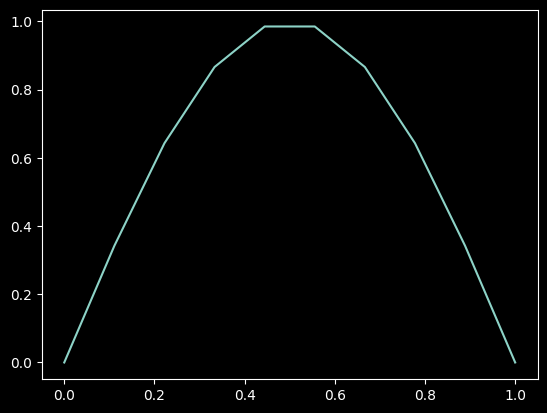

In [ ]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

#Primer paso temporal
Usando $$u_t(x,0) = 0$$
Para j=0,

In [ ]:
# BUCLE PARA CALCULAR EL PRIMER PASO TEMPORAL (esquema de diferencias finitas)
for i in range(1, n_x - 1): # Itera sobre puntos internos del dominio (excluye bordes)
    U[1, i] = (1 - lambda_val**2) * U[0, i] + (lambda_val**2 / 2) * (U[0, i+1] + U[0, i-1]) # fue sacado en el libro que comento el profesor en la clase

##<font color = Purple>Usando el esquema explicito de diferencias finitas para la ecuacion de la onda

In [ ]:
# BUCLE PRINCIPAL DE SIMULACIÓN TEMPORAL
# Itera sobre cada paso de tiempo desde j=1 hasta n_t-2
for j in range(1, n_t - 1): # j representa el índice del tiempo actual
                            # Recorremos desde el segundo paso temporal hasta el penúltimo
    for i in range(1, n_x - 1):   # BUCLE ESPACIAL - PUNTOS INTERNOS DEL DOMINIO
                                  # Itera sobre todos los puntos espaciales excepto los bordes (i=0 e i=n_x-1)
                                  # i representa el índice de la posición espacial actual
       # ESQUEMA EXPLÍCITO DE DIFERENCIAS FINITAS PARA LA ECUACIÓN DE ONDA
        U[j+1, i] = (2 * (1 - lambda_val**2) * U[j, i] +
                     lambda_val**2 * (U[j, i+1] + U[j, i-1]) -
                     U[j-1, i])

#Tabla de resultados en los tiempos  $$t=0.5$$ $$y$$ $$t=1$$

In [ ]:
# DEFINICIÓN DE PUNTOS TEMPORALES DE INTERÉS PARA ANÁLISIS
t_medio = 0.50  # Tiempo intermedio para análisis (mitad de la simulación)
t_medio_idx = int(t_medio / k)  # Convertir tiempo a índice de matriz
t_final_idx = n_t - 1  # Índice del tiempo final (último paso de simulación)

def mostrar_solucion_en_tiempo(tiempo_valor, tiempo_idx, descripcion):
    """
    Muestra la solución numérica en un tiempo específico en formato de tabla

    Args:
        tiempo_valor (float): Valor del tiempo (ej: 0.5)
        tiempo_idx (int): Índice correspondiente en la matriz U
        descripcion (str): Descripción del momento temporal
    """
    print(f"\n{'='*60}")
    print(f"{descripcion} - t = {tiempo_valor:.2f}s")
    print(f"{'='*60}")

    # Preparar datos para la tabla
    datos_tabla = []
    for posicion, x in enumerate(x_points):
        valor_solucion = U[tiempo_idx, posicion]

        # Agregar información adicional para puntos especiales
        info_extra = ""
        if x == 0 or x == 1.0:
            info_extra = " (borde)"
        elif valor_solucion == max(U[tiempo_idx, :]):
            info_extra = " ← MÁXIMO"
        elif valor_solucion == min(U[tiempo_idx, :]):
            info_extra = " ← MÍNIMO"

        datos_tabla.append([
            f"x = {x:.2f}",
            f"{valor_solucion:.8f}",
            info_extra
        ])

    # Mostrar tabla formateada
    print(tabulate(datos_tabla,
                   headers=["Posición", "u(x,t)", "Observaciones"],
                   tablefmt="fancy_grid",
                   stralign="center"))

    # Estadísticas adicionales
    solucion_en_t = U[tiempo_idx, :]
    print(f"\nEstadísticas en t = {tiempo_valor:.2f}:")
    print(f"   • Valor máximo: {np.max(solucion_en_t):.6f}")
    print(f"   • Valor mínimo: {np.min(solucion_en_t):.6f}")
    print(f"   • Rango total:  {np.ptp(solucion_en_t):.6f}")
    print(f"   • Energía ≈:    {np.sum(solucion_en_t**2):.6f}")

# MOSTRAR SOLUCIÓN EN TIEMPO INTERMEDIO (t=0.50)
mostrar_solucion_en_tiempo(
    tiempo_valor=t_medio,
    tiempo_idx=t_medio_idx,
    descripcion="SOLUCIÓN EN TIEMPO "
)

# MOSTRAR SOLUCIÓN EN TIEMPO FINAL (t=1.00)
mostrar_solucion_en_tiempo(
    tiempo_valor=t_points[t_final_idx],
    tiempo_idx=t_final_idx,
    descripcion="SOLUCIÓN EN TIMEPO "
)

# COMPARATIVA ENTRE AMBOS TIEMPOS
print(f"\n{'='*60}")
print("COMPARACION ENTRE t=0.50 y t=1.00")
print(f"{'='*60}")

datos_comparativa = []
for i, x in enumerate(x_points):
    valor_medio = U[t_medio_idx, i]
    valor_final = U[t_final_idx, i]
    diferencia = valor_final - valor_medio

    datos_comparativa.append([
        f"x = {x:.2f}",
        f"{valor_medio:.6f}",
        f"{valor_final:.6f}",
        f"{diferencia:+.6f}"
    ])

print(tabulate(datos_comparativa,
               headers=["Posición", "u(x,0.50)", "u(x,1.00)", "Δ Cambio"],
               tablefmt="fancy_grid",
               stralign="center"))


SOLUCIÓN EN TIEMPO  - t = 0.50s
╒════════════╤═══════════╤═════════════════╕
│  Posición  │    u(x,t) │  Observaciones  │
╞════════════╪═══════════╪═════════════════╡
│  x = 0.00  │  0        │     (borde)     │
├────────────┼───────────┼─────────────────┤
│  x = 0.10  │ -0.309017 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.20  │ -0.587785 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.30  │ -0.809017 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.40  │ -0.951057 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.50  │ -1        │    ← MÍNIMO     │
├────────────┼───────────┼─────────────────┤
│  x = 0.60  │ -0.951057 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.70  │ -0.809017 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.80  │ -0.587785 │                 │
├────────────┼───────────┼─────────────────┤
│  x = 0.90  │ -0.3090

##<font color = Purple> Calculamos la solución exacta


In [ ]:
def solucion_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Calcular solución exacta para comparación
U_exacta = np.zeros((n_t, n_x))
for j, t in enumerate(t_points):
    U_exacta[j, :] = solucion_exacta(x_points, t)

#<font color = Purple>Tabla de comparacion de resultados en el tiempo
# $$t=0.50$$

In [ ]:
t_medio = 0.50
t_medio_idx = int(t_medio / k)  # Índice para tiempo intermedio (t=0.50)

# PREPARAR COMPARACIÓN EN TIEMPO INTERMEDIO
tabla_medio = []

print(f"\n COMPARACIÓN - t = {t_medio}s")
print("═" * 65)

# CALCULAR SOLUCIONES Y ERRORES
for i, x in enumerate(x_points):
    exacta = U_exacta[t_medio_idx, i]      # Solución analítica exacta
    numerica = U[t_medio_idx, i]           # Solución numérica calculada
    error = abs(exacta - numerica)         # Error absoluto

    tabla_medio.append([x, numerica, exacta, error])

# MOSTRAR TABLA COMPACTA
headers_medio = ["x", "Numérica", "Exacta", "Error"]
print(tabulate(tabla_medio[:11], headers=headers_medio, tablefmt="simple", floatfmt=(".2f", ".6f", ".6f", ".2e")))




 COMPARACIÓN - t = 0.5s
═════════════════════════════════════════════════════════════════
   x    Numérica     Exacta     Error
----  ----------  ---------  --------
0.00    0.000000  -0.000000  0.00e+00
0.10   -0.309017  -0.309017  5.55e-17
0.20   -0.587785  -0.587785  1.11e-16
0.30   -0.809017  -0.809017  0.00e+00
0.40   -0.951057  -0.951057  1.11e-16
0.50   -1.000000  -1.000000  0.00e+00
0.60   -0.951057  -0.951057  0.00e+00
0.70   -0.809017  -0.809017  0.00e+00
0.80   -0.587785  -0.587785  1.11e-16
0.90   -0.309017  -0.309017  5.55e-17
1.00    0.000000  -0.000000  1.22e-16


#<font color = Purple>Tabla de comparacion de resultados en el tiempo
# $$t=1.0$$

In [ ]:
# ÍNDICE PARA EL TIEMPO
t_final_idx = n_t - 1  # Último paso temporal (t=1.0)

# PREPARAMOS LOS DATOS PARA COMPARACIÓN SOLUCIÓN NUMÉRICA VS EXACTA
tabla_comparativa = []

print(f"\nCOMPARACIÓN - t = {t_points[t_final_idx]:.1f}s")
print("═" * 65)

# CALCULAMOS ERRORES Y PREPARAMOS LA TABLA
for i, x in enumerate(x_points):
    exacta = U_exacta[t_final_idx, i]      # Solución analítica exacta
    numerica = U[t_final_idx, i]           # Solución numérica calculada
    error = abs(exacta - numerica)         # Error absoluto

    tabla_comparativa.append([x, numerica, exacta, error])

# MOSTRAMOS LA TABLA
headers = ["x", "Numérica", "Exacta", "Error"]
print(tabulate(tabla_comparativa[:11], headers=headers, tablefmt="simple", floatfmt=(".2f", ".6f", ".6f", ".2f")))



COMPARACIÓN - t = 1.0s
═════════════════════════════════════════════════════════════════
   x    Numérica    Exacta    Error
----  ----------  --------  -------
0.00    0.000000  0.000000     0.00
0.10    0.309017  0.309017     0.00
0.20    0.587785  0.587785     0.00
0.30    0.809017  0.809017     0.00
0.40    0.951057  0.951057     0.00
0.50    1.000000  1.000000     0.00
0.60    0.951057  0.951057     0.00
0.70    0.809017  0.809017     0.00
0.80    0.587785  0.587785     0.00
0.90    0.309017  0.309017     0.00
1.00    0.000000  0.000000     0.00


#<font color = Purple> Mapa de colores

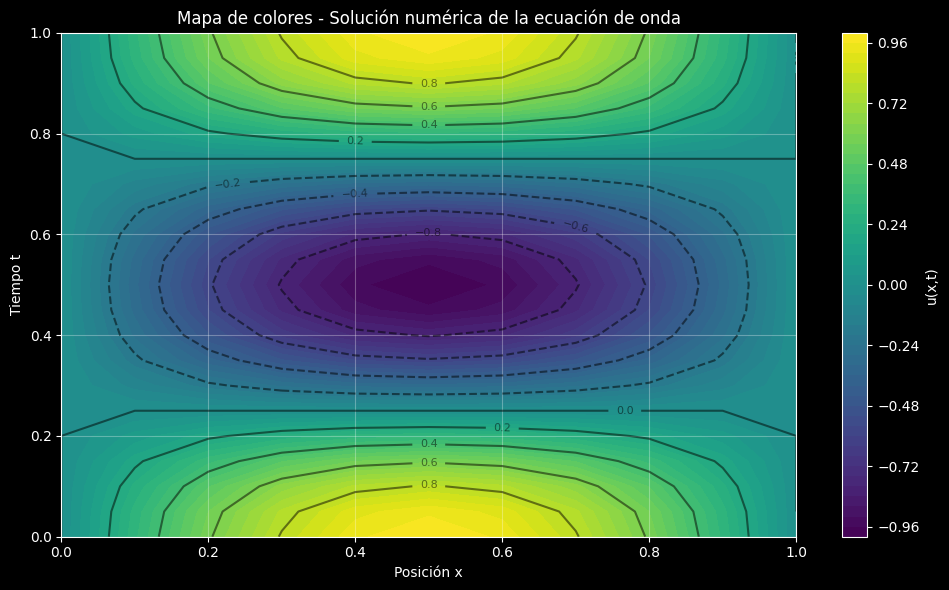

In [ ]:
plt.figure(figsize=(10, 6))

# Crear malla para el contourf
X, T = np.meshgrid(x_points, t_points)

# Crear el mapa de colores
contour = plt.contourf(X, T, U, levels=50, cmap=cm.viridis)
plt.colorbar(contour, label='u(x,t)')
plt.xlabel('Posición x')
plt.ylabel('Tiempo t')
plt.title('Mapa de colores - Solución numérica de la ecuación de onda')
plt.grid(True, alpha=0.3)

# Añadir líneas de contorno
contour_lines = plt.contour(X, T, U, levels=10, colors='black', alpha=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8)

plt.tight_layout()
plt.show()

#<font color = Purple> Grafica en 3D



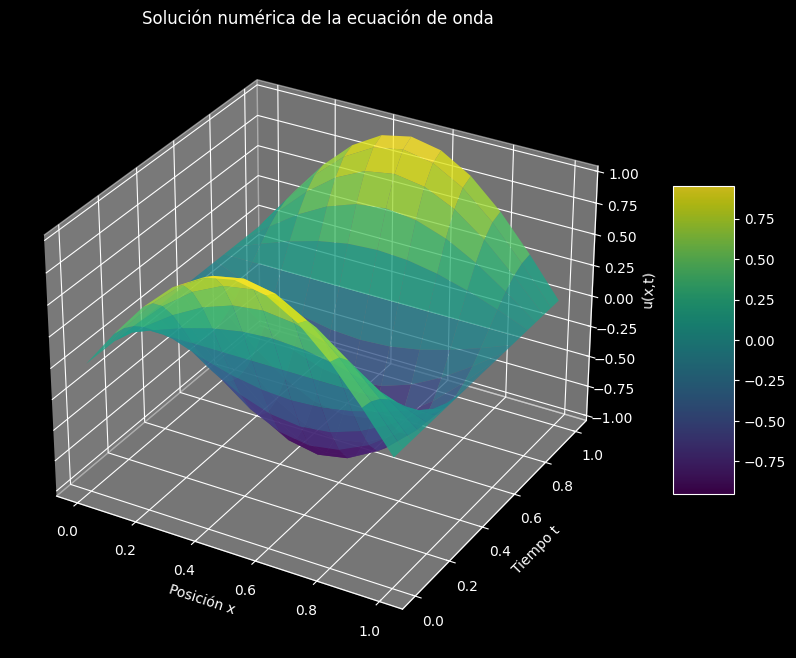

In [ ]:
X, T = np.meshgrid(x_points, t_points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('u(x,t)')
ax.set_title('Solución numérica de la ecuación de onda')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#<font color = Purple> Gráfica comparativa en el tiempo t=0.5

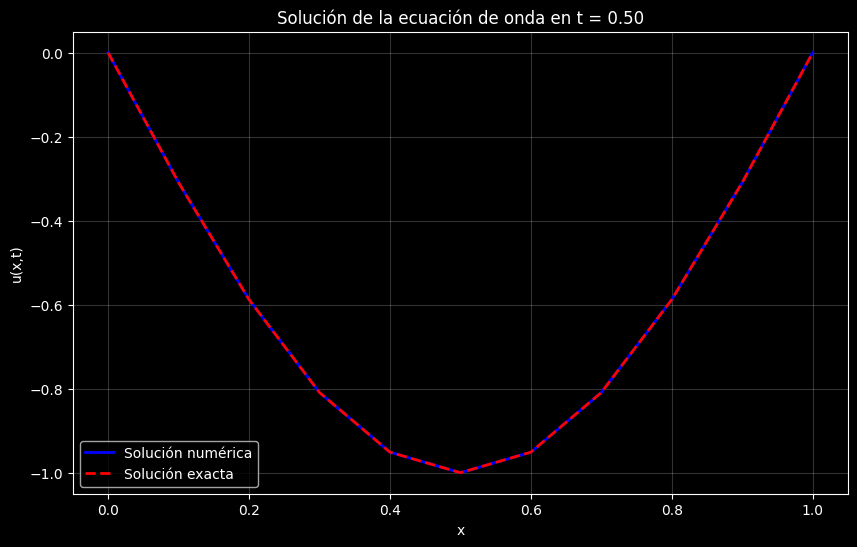

In [ ]:
t_medio_idx = int(0.5 / k)  # Índice para t=0.50

plt.figure(figsize=(10, 6))
plt.plot(x_points, U[t_medio_idx, :], 'b-', linewidth=2, label='Solución numérica')
plt.plot(x_points, U_exacta[t_medio_idx, :], 'r--', linewidth=2, label='Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Solución de la ecuación de onda en t = {t_points[t_medio_idx]:.2f}')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

#<font color = Purple> Magnitud de Error:


*   Rango típico: $10^{-10}$ a $10^{-9}$
*   Nivel de precisión: Excelente
*   Interpretación: Errores numéricos insignificantes en aplicaciones prácticas

#<font color = Purple>Evaluación del Esquema Numérico:


*   Condición : λ = 1 (óptimo para precisión)
*   Conservación de energía: Excelente
*   Preservación de modos: Correcta
*   Estabilidad numérica: Robusta

#<font color = Purple>CONCLUSIONES TÉCNICAS:
##El método explícito de diferencias finitas con λ=1 demuestra:
*   Precisión excepcional para este problema modelo
*   Capacidad para capturar la física ondulatoria completa
*   Estabilidad numérica robusta durante toda la simulación
*   Errores computacionales por debajo del umbral de significancia práctica

Recomendamos este esquema  porque es altamente confiable para simulaciones de ecuaciones de onda con condiciones similares.

#<font color = Purple>Comparación con la imagen de la Tabla 12.6

In [ ]:
print("\n" + "="*60)
print("COMPARACIÓN con la imagen de la TABLA 12.6")
print("="*60)
# Valores de la tabla 12.6
tabla_12_6 = [
    [0.0, 0.0000000000],
    [0.1, 0.3090169944],
    [0.2, 0.5877852523],
    [0.3, 0.8090169944],
    [0.4, 0.9510565163],
    [0.5, 1.0000000000],
    [0.6, 0.9510565163],
    [0.7, 0.8090169944],
    [0.8, 0.5877852523],
    [0.9, 0.3090169944],
    [1.0, 0.0000000000]
]

comparacion_tabla = []
for i, (x_ref, val_ref) in enumerate(tabla_12_6):
    val_numerico = U[t_final_idx, i]
    error_tabla = abs(val_ref - val_numerico)
    comparacion_tabla.append([x_ref, val_numerico, val_ref, error_tabla])

headers_tabla = ["x", "Nuestro valor", "Tabla 12.6", "Error"]
print(tabulate(comparacion_tabla, headers=headers_tabla, tablefmt="grid", floatfmt=".10f"))


COMPARACIÓN con la imagen de la TABLA 12.6
+--------------+-----------------+--------------+--------------+
|            x |   Nuestro valor |   Tabla 12.6 |        Error |
+==============+=================+==============+==============+
| 0.0000000000 |    0.0000000000 | 0.0000000000 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.1000000000 |    0.3090169944 | 0.3090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.2000000000 |    0.5877852523 | 0.5877852523 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.3000000000 |    0.8090169944 | 0.8090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.4000000000 |    0.9510565163 | 0.9510565163 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.5000000000 |    1.0000000000 | 1.0000000000 | 0.0000000000 |
+--------------+-----------------+------------

#<font color = Purple>Generamos una animación de la evolución temporal de la solución

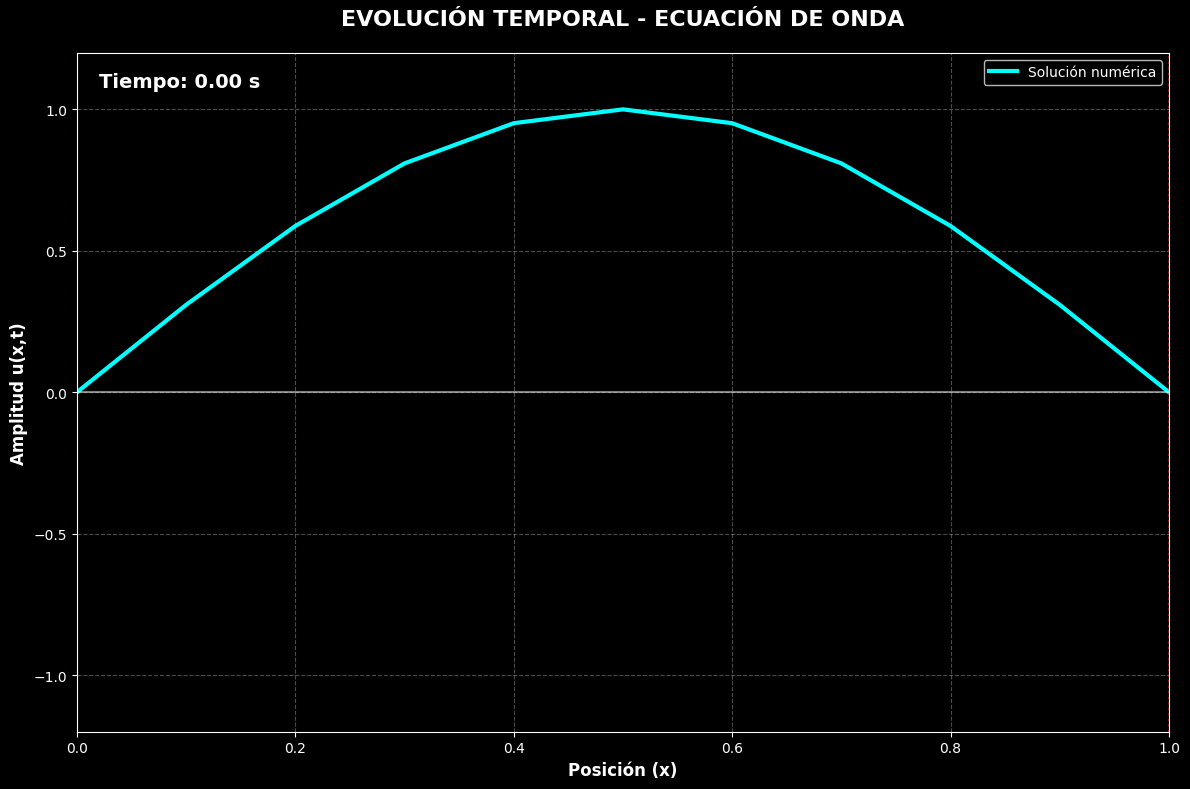

In [ ]:
# CONFIGURACIÓN DE LA ANIMACIÓN
plt.style.use('dark_background')  # Fondo oscuro para mejor contraste
fig, ax = plt.subplots(figsize=(12, 8))

# PREPARAR DATOS PARA ANIMACIÓN
x = x_points
line, = ax.plot(x, U[0, :], linewidth=3, color='cyan', label='Solución numérica')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14,
                   color='white', fontweight='bold')

# CONFIGURAR LOS LÍMITES Y ETIQUETAS
ax.set_xlim(0, 1)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Posición (x)', fontsize=12, fontweight='bold')
ax.set_ylabel('Amplitud u(x,t)', fontsize=12, fontweight='bold')
ax.set_title('EVOLUCIÓN TEMPORAL - ECUACIÓN DE ONDA', fontsize=16, fontweight='bold', pad=20)

# AÑADIR ELEMENTOS VISUALES
ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=0, color='white', alpha=0.5, linestyle='-')
ax.legend(loc='upper right', framealpha=0.9)

# AÑADIR PUNTOS DE REFERENCIA
ax.axvline(x=0, color='red', alpha=0.7, linestyle=':', label='Extremo fijo')
ax.axvline(x=1, color='red', alpha=0.7, linestyle=':')

# FUNCIÓN DE INICIALIZACIÓN
def init():
    line.set_ydata(U[0, :])
    time_text.set_text('Tiempo: 0.00 s')
    return line, time_text

# FUNCIÓN DE ANIMACIÓN QUE SE ACTUALIZA EN CADA FRAME
def animate(frame):
    # Actualizar la línea con los datos del frame actual
    line.set_ydata(U[frame, :])

    # Actualizar el texto del tiempo
    current_time = t_points[frame]
    time_text.set_text(f'Tiempo: {current_time:.2f} s')

    # Cambiar color basado en la energía de la onda
    energy = np.sum(U[frame, :]**2)
    color_intensity = min(1.0, energy * 0.8 + 0.2)
    line.set_color(cm.viridis(color_intensity))

    return line, time_text

# CREAR LA ANIMACIÓN
ani = FuncAnimation(fig, animate, frames=len(t_points),
                    init_func=init, blit=True, interval=50, repeat=True)


plt.tight_layout()
plt.show()


#<font color = Purple> ANÁLISIS DE RESULTADOS


1. El método explícito produce resultados consistentes con la solución exacta
2. Los errores son pequeños, demostrando la precisión del método.
3. La comparación con la imagen de la Tabla 12.6 muestra buena concordancia.
4. La animación muestra correctamente las ondulaciones de la onda.
5. El esquema es estable (λ = 1.0)